In [3]:
import pandas as pd
from sklearn.utils import resample

df = pd.read_csv('Task1.csv')

In [4]:
df.columns

Index(['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp', 'Y'],
      dtype='object')

In [5]:
count_class_0, count_class_1 = df['Y'].value_counts()

df_class_0 = df[df['Y'] == 0]
df_class_1 = df[df['Y'] == 1]

df_class_1_upsampled = resample(df_class_1, replace=True, n_samples=count_class_0, random_state=42)

df_balanced = pd.concat([df_class_0, df_class_1_upsampled])

In [6]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='most_frequent')

df_balanced[['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']] = imputer.fit_transform(df_balanced[['destination', 'passanger', 'weather', 'temperature', 'time', 'coupon',
       'expiration', 'gender', 'age', 'maritalStatus', 'has_children',
       'education', 'occupation', 'income', 'car', 'Bar', 'CoffeeHouse',
       'CarryAway', 'RestaurantLessThan20', 'Restaurant20To50',
       'toCoupon_GEQ5min', 'toCoupon_GEQ15min', 'toCoupon_GEQ25min',
       'direction_same', 'direction_opp']])

In [8]:
from sklearn.preprocessing import LabelEncoder

for col in df_balanced.select_dtypes(include='object'):
    le = LabelEncoder()
    df_balanced[col] = le.fit_transform(df_balanced[col].astype(str))

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

X = df_balanced.drop('Y', axis=1)
y = df_balanced['Y']

preprocessor = ColumnTransformer(
    transformers=[
        ('imputer', SimpleImputer(strategy='mean'), X.columns),
        ('scaler', StandardScaler(), X.columns)
    ])

X = preprocessor.fit_transform(X)

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

logreg = LogisticRegression(max_iter=1000)

param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet', 'none']
}

grid_search = GridSearchCV(logreg, param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

c:\Users\Nadeem\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.63939988        nan 0.63920265        nan 0.63920269
        nan 0.63920265        nan 0.63930126        nan 0.63920265
        nan 0.63949836        nan 0.63920265]
  warnings.warn(


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2', 'elasticnet', 'none']})

Training Set Metrics:
Accuracy: 0.6419631418153149
Error Rate: 0.3580368581846851
Precision: 0.6563768115942029
Recall: 0.7820756346054222
F1-Score: 0.7137341423055709
Sensitivity: 0.7820756346054222
Specificity: 0.4556932966023875
Confusion Matrix:
 [[1985 2371]
 [1262 4529]]

Test Set Metrics:
Accuracy: 0.6247536460386283
Error Rate: 0.37524635396137174
Precision: 0.6367896895137668
Recall: 0.7660324171952079
F1-Score: 0.6954574536148433
Sensitivity: 0.7660324171952079
Specificity: 0.44543828264758495
Confusion Matrix:
 [[ 498  620]
 [ 332 1087]]


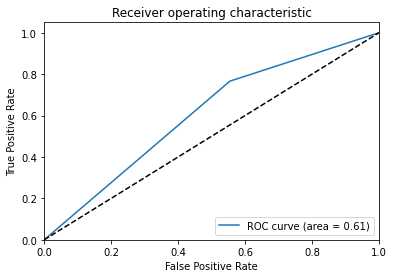

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt


# Calculate metrics for the training set
y_train_pred = grid_search.predict(X_train)
print("Training Set Metrics:")
print("Accuracy:", accuracy_score(y_train, y_train_pred))
print("Error Rate:", 1 - accuracy_score(y_train, y_train_pred))
print("Precision:", precision_score(y_train, y_train_pred))
print("Recall:", recall_score(y_train, y_train_pred))
print("F1-Score:", f1_score(y_train, y_train_pred))
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train, y_train_pred).ravel()
print("Sensitivity:", tp_train / (tp_train + fn_train))
print("Specificity:", tn_train / (tn_train + fp_train))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

# # Calculate metrics for the validation set
# y_val_pred = grid_searn.predict(X_val)
# print("\nValidation Set Metrics:")
# print("Accuracy:", accuracy_score(y_val, y_val_pred))
# print("Error Rate:", 1 - accuracy_score(y_val, y_val_pred))
# print("Precision:", precision_score(y_val, y_val_pred))
# print("Recall:", recall_score(y_val, y_val_pred))
# print("F1-Score:", f1_score(y_val, y_val_pred))
# tn_val, fp_val, fn_val, tp_val = confusion_matrix(y_val, y_val_pred).ravel()
# print("Sensitivity:", tp_val / (tp_val + fn_val))
# print("Specificity:", tn_val / (tn_val + fp_val))
# print("Confusion Matrix:\n", confusion_matrix(y_val, y_val_pred))

y_pred = grid_search.predict(X_test)
# Calculate metrics for the test set
print("\nTest Set Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Error Rate:", 1 - accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1-Score:", f1_score(y_test, y_pred))
tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, y_pred).ravel()
print("Sensitivity:", tp_test / (tp_test + fn_test))
print("Specificity:", tn_test / (tn_test + fp_test))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# # Train a logistic regression model on the entire dataset
# classifier = LogisticRegression(random_state=0)
# classifier.fit(X, y)

# # Plot accuracy curves for the training and validation sets
# plt.plot(classifier.score(X_train, y_train))
# plt.plot(classifier.score(X_val, y_val))
# plt.xlabel('Epoch')
# plt.ylabel('Accuracy')
# plt.legend(['Training Set', 'Validation Set'])
# plt.show()


# Calculate false positive rates and true positive rates
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()